# Traveling Santa 2018 - Prime Paths

In [1]:
import pandas as pd
import numpy as np
import operator
import random

from GA import *

import matplotlib.pyplot as plt

In [2]:
cities = pd.read_csv('cities.csv')

In [3]:
cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


You are provided a list of cities and their coordinates in cities.csv. You must create the shortest possible path that visits all the cities. Your submission file is simply the ordered list in which you visit each city. Paths have the following constraints:

- Paths must start and end at the North Pole (CityId = 0)
- You must visit every city exactly once
- The distance between two paths is the 2D Euclidean distance, except...
- Every 10th step (stepNumber % 10 == 0) is 10% more lengthy unless coming from a prime CityId.

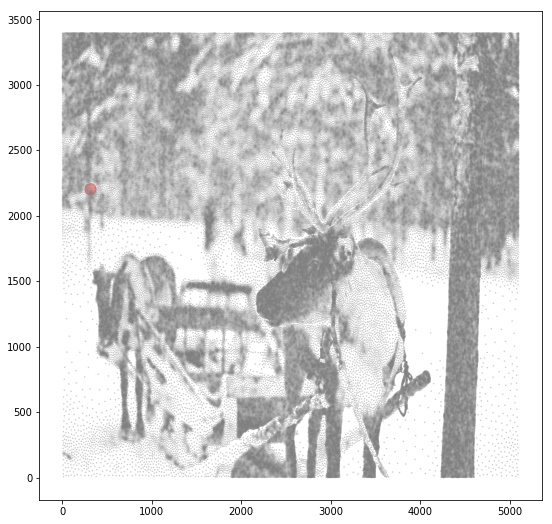

In [4]:
fig = plt.figure(figsize=(9,9))
plt.scatter(cities.X, cities.Y, marker='.', alpha=0.4, c=np.where(cities.CityId==0, 'red', 'gray'), s=np.where(cities.CityId==0, 500, 1))
plt.show()

In [5]:
# Every 10th step (stepNumber % 10 == 0) is 10% more lengthy unless coming from a prime CityId.
# Creating column to check if the city is a prime number.

def check_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n%i for i in range(3, int(np.sqrt(n))+1, 2))

is_prime = np.vectorize(check_prime)
cities.loc[:,'is_prime'] = is_prime(cities.CityId.values)

In [6]:
cityList=[]
for i in range(0, cities.shape[0]):
    cityList.append(City(x=cities.loc[i, 'X'], 
                         y=cities.loc[i, 'Y'], 
                         ID=cities.loc[i, 'CityId'], 
                         is_prime=cities.loc[i, 'is_prime']))

In [11]:
POP_SIZE      = 10
ELITE_SIZE    = 2
MUTATION_RATE = 0.01
GENERATIONS   = 1

In [ ]:
bestRoute = geneticAlgorithm(
    population=cityList, 
    popSize=POP_SIZE, 
    eliteSize=ELITE_SIZE, 
    mutationRate=MUTATION_RATE, 
    generations=GENERATIONS)

Initial distance: 446484421.6986644


In [ ]:
route = [route.ID for route in bestRoute]